c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


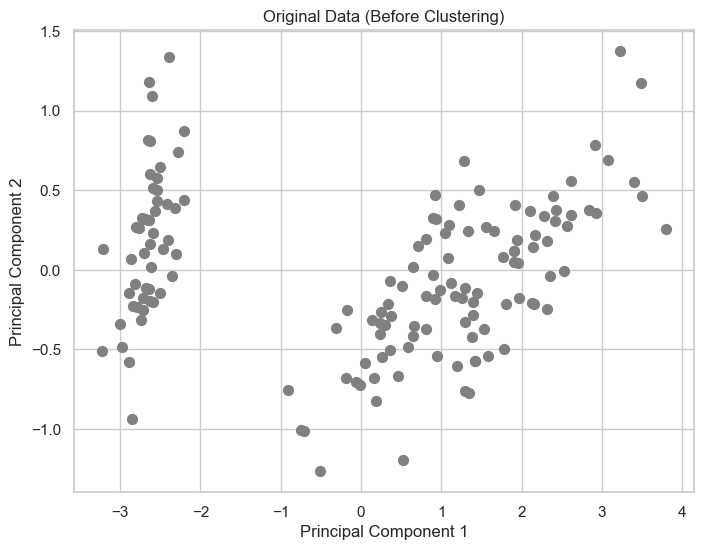

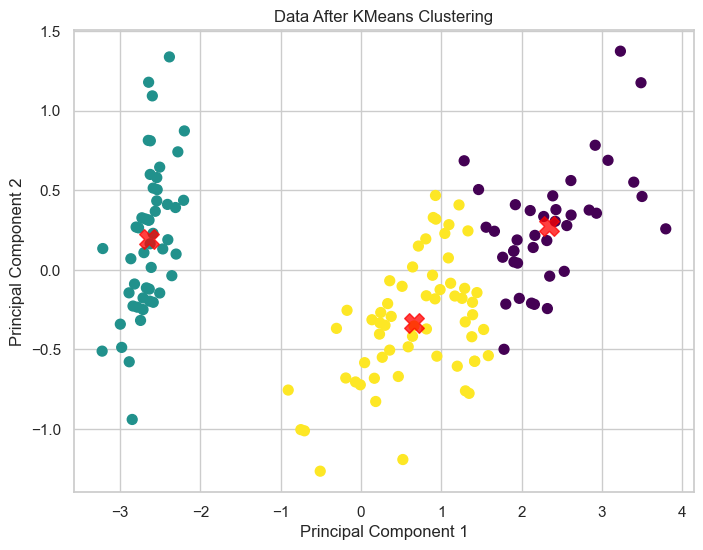

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Use PCA to reduce the dimensionality of the data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Get cluster centers
centers = kmeans.cluster_centers_

# Set plot style
sns.set(style="whitegrid")

# Visualize the original data (before clustering)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='grey', s=50)
plt.title('Original Data (Before Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualize the data after applying KMeans clustering with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Plot cluster centers
plt.title('Data After KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


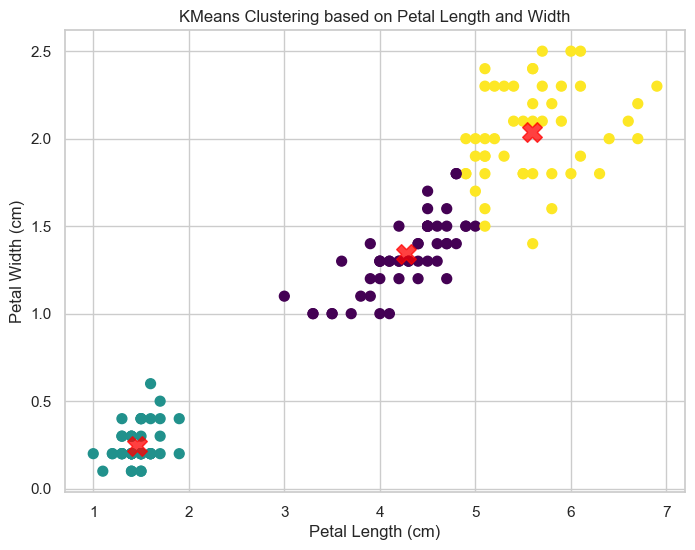

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Use petal length and petal width for clustering and visualization
x = df[['petal length (cm)', 'petal width (cm)']]  # Select the petal length and width columns for clustering

# Apply KMeans clustering
model = KMeans(n_clusters=3, n_init='auto', random_state=1)
model.fit(x)

# Get cluster labels and cluster centers
clusters = model.labels_
centers = model.cluster_centers_

# Set plot style
sns.set(style="whitegrid")

# Visualize the data after applying KMeans clustering using petal length and petal width
plt.figure(figsize=(8, 6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=clusters, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Plot cluster centers
plt.title('KMeans Clustering based on Petal Length and Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


In [ ]:
DistanceList = []
for i in range(1,11): #測試將資料分為1~10群
    KM = KMeans(n_clusters=i, n_init='auto', random_state=1)
    KM.fit(x)
    DistanceList.append(KM.inertia_) #求出每個Cluster內的資料與其中心點之平方距離和，並用List記錄起來
plt.plot(range(1,11), DistanceList)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Use petal length and petal width for clustering
x = df[['petal length (cm)', 'petal width (cm)']]

# Elbow method (using inertia)
DistanceList = []
for i in range(1, 11):  # Test different numbers of clusters from 1 to 10
    KM = KMeans(n_clusters=i, n_init='auto', random_state=1)
    KM.fit(x)
    DistanceList.append(KM.inertia_)  # Record inertia (sum of squared distances to centroids)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), DistanceList, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score and Calinski-Harabasz Index for different k
silhouette_scores = []
calinski_harabasz_scores = []

for i in range(2, 11):  # Silhouette and Calinski-Harabasz can't be calculated for k=1
    KM = KMeans(n_clusters=i, n_init='auto', random_state=1)
    clusters = KM.fit_predict(x)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(x, clusters)
    silhouette_scores.append(silhouette_avg)

    # Calculate Calinski-Harabasz index
    calinski_harabasz_avg = calinski_harabasz_score(x, clusters)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Plot Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', label='Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(x)

# Visualize DBSCAN result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df, hue=dbscan_clusters, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 設定隨機種子以確保結果可重現
np.random.seed(10)

# 生成數據集
nb_samples = 1000
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5)

# 建立 K-means 模型
km = KMeans(n_clusters=3)
km.fit(X)

# 分群前的可視化
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='grey', s=50, edgecolor='k')
plt.title('Before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 分群後的可視化
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=50, cmap='viridis', edgecolor='k')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, marker='x')  # 顯示質心
plt.title('After K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 設定隨機種子以確保結果可重現
np.random.seed(10)

# 生成數據集
nb_samples = 1000
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5)

# 定義不同的 K 值
K_values = [2, 4, 5]

plt.figure(figsize=(18, 6))

# 對每個 K 值進行分群並可視化
for i, K in enumerate(K_values):
    km = KMeans(n_clusters=K)
    km.fit(X)

    # 分群後的可視化
    plt.subplot(1, len(K_values), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=50, cmap='viridis', edgecolor='k')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, marker='x')  # 顯示質心
    plt.title(f'K-means Clustering (K={K})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.show()
